In [1]:
import pandas as pd

data = pd.read_csv("training.processed.noemoticon.csv",encoding='latin-1', engine="python",error_bad_lines=False)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


FileNotFoundError: ignored

In [ ]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "usuario", "Tweet"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,usuario,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.target.unique()

array([0, 4])

In [ ]:
data = data[data['target'] == 4]

In [ ]:
data['label'] = 0
data = data[["target", "ids", "date", "flag", "usuario", "Tweet", 'label']]
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,target,ids,date,flag,usuario,Tweet,label
814016,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,0
814017,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,0
814018,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",0
814019,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,0
814020,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,0


In [ ]:
col_names = ['ids', 'Tweet']
depressive_tweets_df = pd.read_csv("depressive_tweets_processed.csv", sep = '|', header = None, usecols = [0,5], nrows = 3200, names=col_names)
depressive_tweets_df

,ids,Tweet
0,989292962323615744,The lack of this understanding is a small but ...
1,989292959844663296,i just told my parents about my depression and...
2,989292951716155392,depression is something i don't speak about ev...
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...
...,...,...
2340,989036568781389830,Many sufferers of depression aren't sad; they ...
2341,989036542898397185,No Depression by G Herbo is my mood from now o...
2342,989036488162766848,What do you do when depression succumbs the br...
2343,989036488158572544,Ketamine Nasal Spray Shows Promise Against Dep...


In [ ]:
depressive_tweets_df['label'] = 1
depressive_tweets_df = depressive_tweets_df[['Tweet', 'label', 'ids']]

In [ ]:
df = pd.concat([data,depressive_tweets_df])
#df = df.sample(frac=1) # los mezclo
df.head()

,target,ids,date,flag,usuario,Tweet,label
814016,4.0,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,0
814017,4.0,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,0
814018,4.0,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",0
814019,4.0,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,0
814020,4.0,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,0


In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

In [ ]:
def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
!pip install tweet-preprocessor
!python3 -m nltk.downloader stopwords

import preprocessor as p

BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        tweet = tweet.lower()
        tweet = BAD_SYMBOLS_RE.sub(' ', tweet)
        tweet = p.clean(tweet)
        tweet = expandContractions(tweet)
        tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())
        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        tweet = ' '.join(filtered_sentence)
        
        cleaned_tweets.append(tweet)
        
    return cleaned_tweets

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
X = clean_tweets([tweet for tweet in df['Tweet']])
df['Tweet'] = X

In [ ]:
df = df[['ids','Tweet','label']]


In [ ]:
df.head()

,ids,Tweet,label
814016,1467822272,love health4uandpets u guys r best,0
814017,1467822273,im meeting one besties tonight cant wait girl ...,0
814018,1467822283,darealsunisakim thanks twitter add sunisa got ...,0
814019,1467822287,sick really cheap hurts much eat real food plu...,0
814020,1467822293,lovesbrooklyn2 effect everyone,0


In [ ]:
X = df[df['label'] == 1]
Y = df[df['label'] == 0]

In [ ]:
X["Tweet"] = X["Tweet"].str.replace('https', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud


In [ ]:
depressive_words = ' '.join(list(map(str, X['Tweet'])))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)

In [ ]:
not_depressive_words = ' '.join(list(map(str, Y['Tweet'])))
not_depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(not_depressive_words)

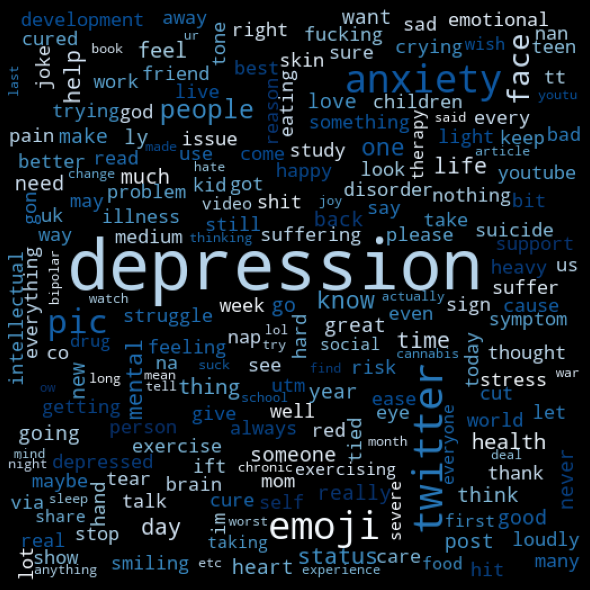

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

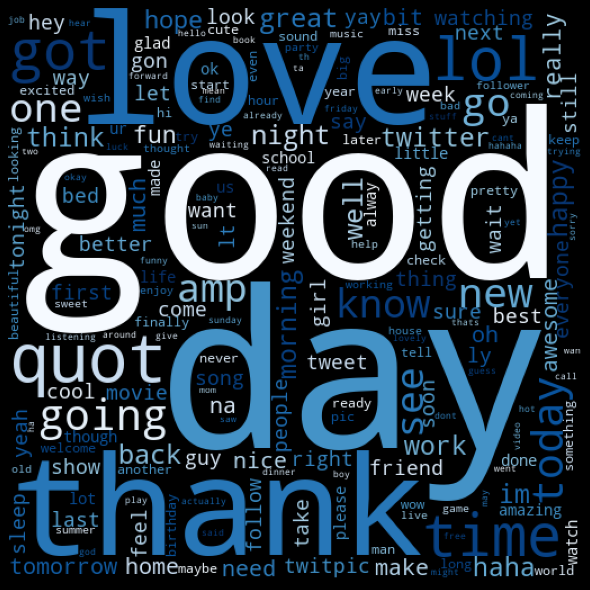

In [ ]:
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

Text(0.5, 1.0, 'Dataset labels distribuition')

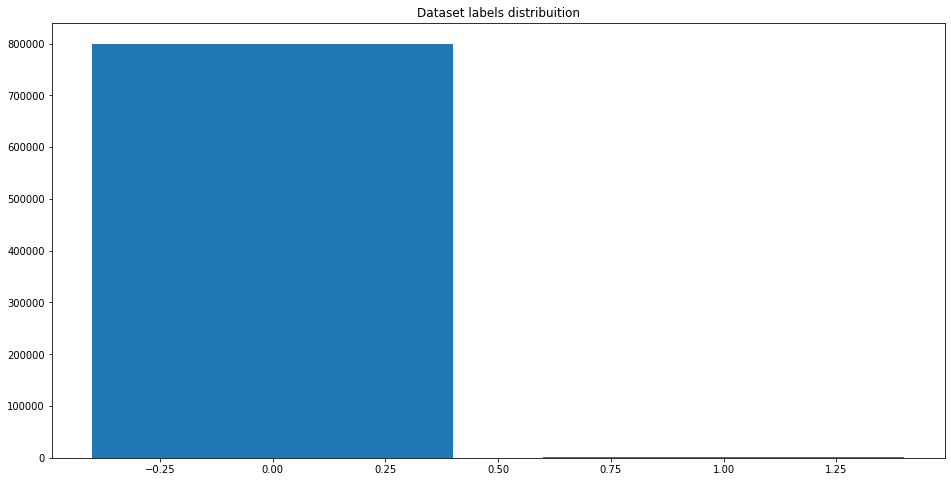

In [ ]:
from collections import Counter
label_cnt = Counter(df.label)

plt.figure(figsize=(16,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
X['Tweet'].shape, Y['Tweet'].shape

In [ ]:
import collections 
all_Y_words = []
for line in list(Y['Tweet']):
    words = line.split()
    for word in words:
        all_Y_words.append(word.lower())
    
    
collections.Counter(all_Y_words).most_common(10)

[('good', 62134),
 ('day', 48150),
 ('love', 47810),
 ('http', 47219),
 ('quot', 45931),
 ('like', 37528),
 ('get', 36567),
 ('lol', 36132),
 ('com', 35542),
 ('thanks', 34530)]

In [ ]:
all_X_words = []
for line in list(X['Tweet']):
    words = line.split()
    for word in words:
        all_X_words.append(word.lower())
    
    
collections.Counter(all_X_words).most_common(10)

[('depression', 2343),
 ('com', 632),
 ('twitter', 450),
 ('emoji', 367),
 ('anxiety', 359),
 ('pic', 283),
 ('http', 231),
 ('face', 215),
 ('like', 203),
 ('www', 174)]

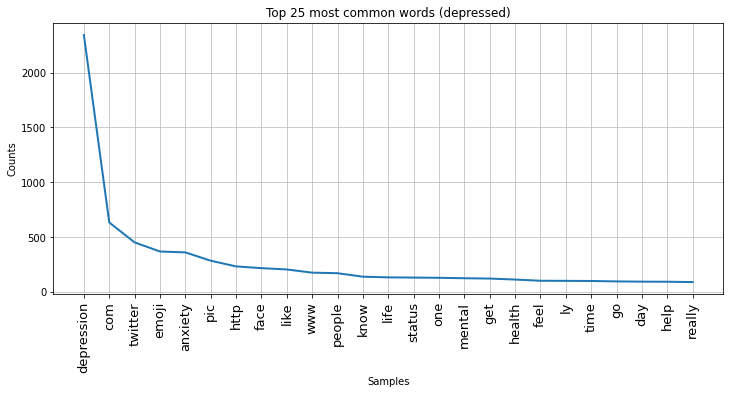

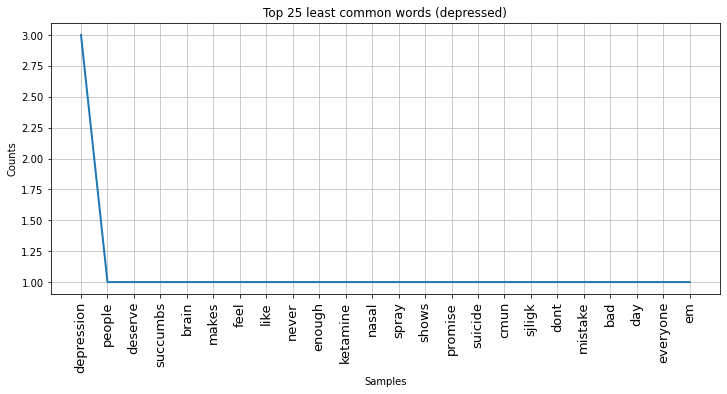

In [ ]:
# plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words (depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_X_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 25 least common words (depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_X_words[-26:])
fd.plot(cumulative=False)

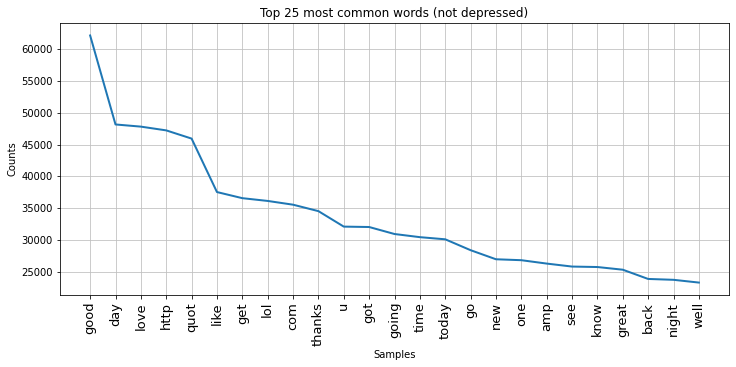

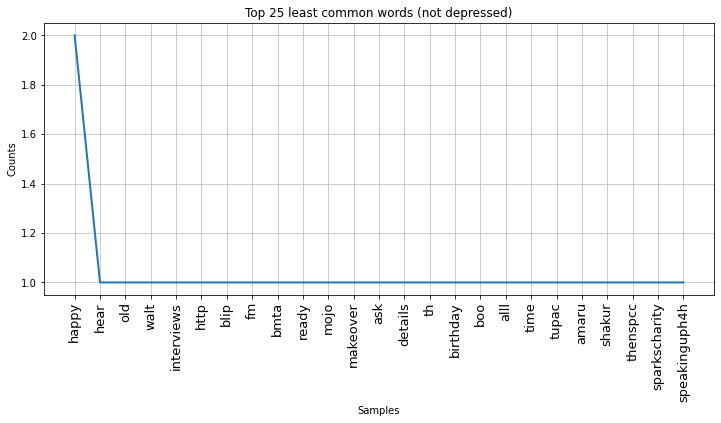

In [ ]:
# plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words (not depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_Y_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 25 least common words (not depressed)')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_Y_words[-26:])
fd.plot(cumulative=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802345 entries, 814016 to 2344
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ids     802345 non-null  object
 1   Tweet   802345 non-null  object
 2   label   802345 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.5+ MB


In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)

ids      0.0
Tweet    0.0
label    0.0
dtype: float64

In [ ]:
y = Y['Tweet'].sample(n = 2345)


In [ ]:
y.shape

(2345,)

In [ ]:
X['Tweet']

0       lack understanding small significant part caus...
1       told parents depression hard get gen x people ...
2       depression something speak even going also dou...
3       made tortilla filled pb j depression cured oli...
4       worldofoutlaws gon na need depression meds soo...
                              ...                        
2340    many sufferers depression sad feel nothing per...
2341    depression g herbo mood done stressing people ...
2342    depression succumbs brain makes feel like neve...
2343    ketamine nasal spray shows promise depression ...
2344          dont mistake bad day depression everyone em
Name: Tweet, Length: 2345, dtype: object

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(X['Tweet'])

y = y

model = SVC()

model.fit(X,y)

model.score(X,y)

0.9646055437100213

In [ ]:
prueba = pd.read_csv("depressive_tweets.csv")

In [ ]:
prueba.shape

(24147, 7)

In [ ]:
prueba.head(30)

,Unnamed: 0,tweet.id,created_at,text,location,retweet,favorite
0,0,1447537898572574730,2021-10-11 12:21:43,Open discussion. Between the Transfer Portal a...,Cheyenne Wyoming,0,0
1,1,1447540582490988553,2021-10-11 12:32:23,Plenty of things are changing in my life and t...,NaN,0,0
2,2,1447807717859491842,2021-10-12 06:13:53,I feel a little hopeless. Anyone else? #hopele...,NaN,0,0
3,3,1448076026219692033,2021-10-13 00:00:03,"Which is more healthy? Hope, or hopelessness? ...","Denver, CO",0,0
4,4,1448382047375040513,2021-10-13 20:16:04,So someone tell me how do I get over #HOPELESS...,Portland Or .,0,2
5,5,1448595145138622464,2021-10-14 10:22:50,No parent deserves to experience the Indian le...,"Bombay, Dubai",1,4
6,6,1448843909841313793,2021-10-15 02:51:20,Being in a #union also looks a lot like being ...,"Alberta, Canada",7,17
7,7,1449848070783524864,2021-10-17 21:21:31,I am so glad that @GreysABC is tackling the hu...,NaN,0,1
8,8,1447537898572574730,2021-10-11 12:21:43,Open discussion. Between the Transfer Portal a...,Cheyenne Wyoming,0,0
9,9,1447540582490988553,2021-10-11 12:32:23,Plenty of things are changing in my life and t...,NaN,0,0


In [ ]:
prueba['text']

0        Open discussion. Between the Transfer Portal a...
1        Plenty of things are changing in my life and t...
2        I feel a little hopeless. Anyone else? #hopele...
3        Which is more healthy? Hope, or hopelessness? ...
4        So someone tell me how do I get over #HOPELESS...
                               ...                        
24142                 Just got banned from a server F #sad
24143    I literally cried during my exam and the cam i...
24144    No one can be happy with a guy like me. That's...
24145    arrived at my house but Am I Home? #deep #sad ...
24146    Being spoken down to rn at @starbucks and reme...
Name: text, Length: 24147, dtype: object